In [16]:
%autosave 20
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

from sklearn import cluster
from sklearn import mixture

Autosaving every 20 seconds


(688, 2)


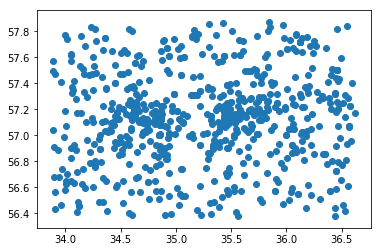

In [12]:
center_coord = SkyCoord('02h21m00s +57d07m42s')
vizier = Vizier(
    column_filters={'Bmag': '<13'},  # число больше — звёзд больше
    row_limit=10000
)
stars = vizier.query_region(
    center_coord,
    width=1.5 * u.deg,
    height=1.5 * u.deg,
    catalog='USNO-A2.0',
)[0]
ra = stars['RAJ2000']._data  # прямое восхождение, аналог долготы
dec = stars['DEJ2000']._data  # склонение, аналог широты

x = np.stack((ra, dec), axis=1)
i = np.random.choice(x.shape[0], size=x.shape[0], replace=False)
x = x[i]
print(x.shape)

plt.scatter(*x.T)

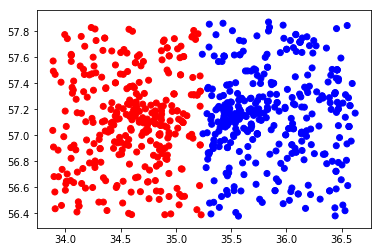

In [17]:
colors = np.array([[0., 0., 1.], [1., 0., 0.]])

kmeans = cluster.KMeans(n_clusters=2, n_jobs=-1)
y = kmeans.fit_predict(x)
plt.scatter(*x.T, color=colors[y])

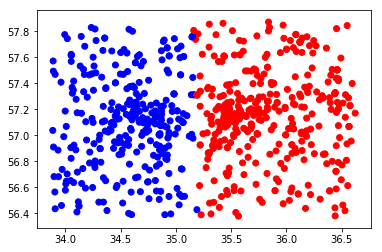

In [19]:
gm = mixture.GaussianMixture(n_components=2)
gm.fit(x)
y = gm.predict(x)
plt.scatter(*x.T, color=colors[y])